In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

2022-10-24 16:23:03.280336: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-24 16:23:03.449900: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-24 16:23:03.449929: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-24 16:23:03.481519: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-24 16:23:05.631186: W tensorflow/stream_executor/platform/de

In [2]:
tf.config.experimental.list_physical_devices()

2022-10-24 16:23:19.148759: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-24 16:23:19.195989: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-24 16:23:19.196094: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (karthikeya): /proc/driver/nvidia/version does not exist


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:
tf.test.is_built_with_cuda()

True

In [7]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 641s 4us/step


In [13]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3) (50000, 1) (10000, 1)


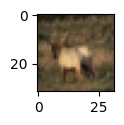

In [21]:
plt.figure(figsize=(10,1))
plt.imshow(X_train[3])

In [16]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [20]:
classes[y_train[3][0]]

'deer'

In [23]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [29]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [25]:
X_train.shape

(50000, 32, 32, 3)

In [26]:
32*32*3

3072

In [27]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
# use 'SGD' next tiem
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_scaled,y_train_categorical, epochs=50)

2022-10-24 18:31:13.288659: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-24 18:31:22.229554: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/50
1563/1563 [==============================] - 108s 67ms/step - loss: 1.8814 - accuracy: 0.3281
Epoch 2/50
1563/1563 [==============================] - 99s 63ms/step - loss: 1.6617 - accuracy: 0.4003
Epoch 3/50
1563/1563 [==============================] - 99s 64ms/step - loss: 1.5876 - accuracy: 0.4277
Epoch 4/50
1563/1563 [==============================] - 99s 63ms/step - loss: 1.5357 - accuracy: 0.4478
Epoch 5/50
1563/1563 [==============================] - 99s 64ms/step - loss: 1.4987 - accuracy: 0.4626
Epoch 6/50
1563/1563 [==============================] - 98s 63ms/step - loss: 1.4661 - accuracy: 0.4766
Epoch 7/50
1563/1563 [==============================] - 98s 63ms/step - loss: 1.4402 - accuracy: 0.4867
Epoch 8/50
1563/1563 [==============================] - 99s 63ms/step - loss: 1.4148 - accuracy: 0.4913
Epoch 9/50
1563/1563 [==============================] - 99s 63ms/step - loss: 1.3926 - accuracy: 0.4998
Epoch 10/50
1563/1563 [==============================] - 99s 64

In [30]:
model.evaluate(X_test_scaled, y_test_categorical)

  1/313 [..............................] - ETA: 44s - loss: 2.0117 - accuracy: 0.4375

2022-10-24 19:57:00.265833: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 122880000 exceeds 10% of free system memory.


313/313 [==============================] - 4s 11ms/step - loss: 1.9026 - accuracy: 0.4762


[1.9025784730911255, 0.47620001435279846]

In [31]:
def get_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')
    ])
    # use 'SGD' next tiem
    model.compile(
        optimizer='SGD',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [32]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [33]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled,y_train_categorical, epochs=1)

2022-10-24 20:10:10.800225: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 [==============================] - 114s 70ms/step - loss: 1.8976 - accuracy: 0.3269


In [ ]:
# try it if you have a gpu
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled,y_train_categorical, epochs=1)